In [1]:
import sys
sys.path.append('../')

import pandas as pd 
import seaborn as sns 
import numpy as np

import dft_descriptors.prepocessing as pp
import dft_descriptors.featurisation as ft

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import copy

font = {'family' : 'normal',
        'size'   : 25}
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
matplotlib.rcParams['axes.unicode_minus'] = False
sns.set_style("white")
%matplotlib inline

In [6]:
# Load NiCOlit dataset
df = pd.read_csv("data_csv/Data_test11262021.csv", sep = ',')

# Preporcess NiCOlit dataset
def AL_preprocess(df):
    df["Lewis Acid"] = df["Lewis Acid"].fillna('NoLewisAcid')
    df["Lewis Acid"] = df["Lewis Acid"].replace('nan', 'NoLewisAcid')
    Lewis_Acids_to_drop = ['O=C(O[Cs])O[Cs]', 'Cl[Cs]', 
                       'O=S(=O)(O[Sc](OS(=O)(=O)C(F)(F)F)OS(=O)(=O)C(F)(F)F)C(F)(F)F', 
                       'F[Cs]', 'O=P(O[Na])(O[Na])O[Na]', '[Rb+]',
                       'CC(C)(C)C(=O)O[Cs]', '[Cs+]', 'CC(=O)O[Cu]OC(C)=O', 'F[Sr]F']
    for al in Lewis_Acids_to_drop:
        df = df[df["Lewis Acid"] != al]
    
    return df.reset_index(drop=True)

def replace_meca(df):
    df.replace(to_replace='Murahashi', value='Organolithiums', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Negishi', value='Organozincs', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Kumada', value='Organomagnesiums', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Suzuki', value='Boron derivatives', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='C-H activation', value='Activated C-Hs', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Isocyanates', value='Isocyanates', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Hiyama', value='Organosilanes', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='CO2 Insertion', value='Carbon dioxide', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Buchwald', value='Amines', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Ni/Cu cooperation', value='Amines', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Al _coupling', value='Organoaluminums', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='P_coupling', value='Phosphoryls', inplace=True,
                   limit=None, regex=False, method='pad')
    df.rename(columns={"Coupling Partners": "Coupling Reagent"}, inplace=True)

df2 = pp.preprocess(df)
df2 = AL_preprocess(df2)

In [7]:
# DFT Featurize NiCOlit dataset
X, y, DOIs, coupling_partners, origins = ft.process_dataframe_dft(copy.copy(df2), data_path="data_csv/")
display_df =  pd.DataFrame(zip(y, coupling_partners, origins, DOIs), 
                           columns =['Yields', 'Coupling Partners', 'Origin', 'DOIs'])

# Rename Coupling Partner Classes
replace_meca(display_df)
dois = np.unique(DOIs)

NoLigand


In [9]:
# Perform TSNE of the NiCOlit featurized and get two frist components
X_embedded = TSNE(n_components=2, random_state=11).fit_transform(X)
tsne1 = [i[0] for i in X_embedded]
tsne2 = [i[1] for i in X_embedded]

In [10]:
# Choose a DOI, Coupling Partner, Substrate
num_doi = 5     # DOI choice
num_coupl = 11  # Boronic Partner
num_sub = 5     # Substrate 

coupling_partner = np.unique(coupling_partners)
substrates = df2["Reactant Smile (C-O)"].unique()

# Perform data splitting random, by DOI, by coupling partner and by substrate
nums = np.random.choice([0, 1], size=len(X_embedded), p=[.3, .7])
random_split= ["Test Set" if i == 0 else "Train Set" for i in nums]
doi_split = ["Test Set" if i == dois[num_doi] else "Train Set" for i in DOIs]
coupl_split = ["Test Set" if i == coupling_partner[num_coupl] else "Train Set" for i in coupling_partners]
substrate_split = ["Test Set" if i == 'CC(C)(C)C(=O)Oc1ccc2ccccc2c1' else "Train Set" for i in df2["Reactant Smile (C-O)"]]

# Make data_frame for future plot
tsne_df = pd.DataFrame(zip(tsne1, tsne2, DOIs, coupling_partners, origins, y, 
                           random_split, doi_split, coupl_split, substrate_split), 
                       columns =['TSNE 1', 'TSNE 2', 'DOIs', 'Coupling Partners', 'Origin', 
                                 'Yields', 'Random Split', 'DOI Split', 
                                 'Coupling Reagent Split', 'Subtrate Split'])

# Update names of coupling partners
replace_meca(tsne_df)

In [19]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /site/rp/work/projects/DD/Jupyter/lib/python3.6/site-packages
Requires: numpy, scipy, matplotlib, pandas
Required-by: 


In [17]:
np.unique(tsne_df['DOIs'])

array(['Thèse', 'https://doi.org/10.1002/adsc.201600590',
       'https://doi.org/10.1002/anie.200453765',
       'https://doi.org/10.1002/anie.200801447',
       'https://doi.org/10.1002/anie.200907287',
       'https://doi.org/10.1002/anie.201403823',
       'https://doi.org/10.1002/chem.201003731',
       'https://doi.org/10.1002/chem.201103784',
       'https://doi.org/10.1002/chem.201603436',
       'https://doi.org/10.1002/ejic.201900692',
       'https://doi.org/10.1021/acs.joc.6b00289',
       'https://doi.org/10.1021/acs.joc.6b01627',
       'https://doi.org/10.1021/acs.organomet.5b00874',
       'https://doi.org/10.1021/acs.organomet.9b00543',
       'https://doi.org/10.1021/acs.orglett.6b02656',
       'https://doi.org/10.1021/acs.orglett.6b03861',
       'https://doi.org/10.1021/acscatal.7b01058',
       'https://doi.org/10.1021/acscatal.8b03436',
       'https://doi.org/10.1021/ja200398c',
       'https://doi.org/10.1021/ja210249h',
       'https://doi.org/10.1021/ja410883

## Visualize DOI and Coupling Partner TSNE Distributions

ValueError: could not convert string to float: 'https://doi.org/10.1002/chem.201603436'

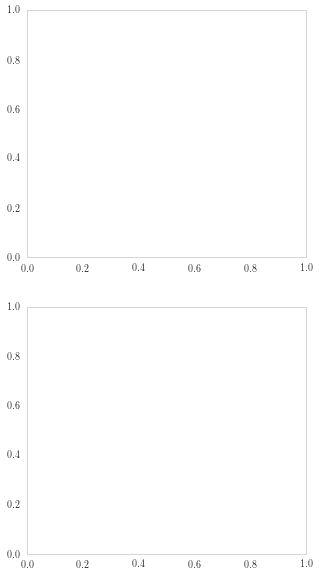

In [11]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig, ax = plt.subplots(2, 1, figsize=(5, 10))

# first plot TSNE by Coupling Partner
sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=False, thresh=0.0003,
                palette ='bright', gridsize=100,
                cut = 3, alpha  = 0.4, linewidth=50,
           ax = ax[0])

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=True, thresh=0.0003,
                palette ='bright', gridsize=100, alpha  = 0.5,
           ax = ax[0])

legend = ax[0].get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
ax[0].get_legend().remove()

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", legend=False,
                alpha=0.2, palette='bright', linewidth=0.1, ax= ax[0])

ax[0].set_title("Coupling Partner Distribution")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xbound(lower=-75, upper=75)
ax[0].set_ybound(lower=-70, upper=70)
ax[0].legend(handles, labels, 
             bbox_to_anchor=(1.05, 0, 1.1, 1), 
             ncol=2,
             mode= "expand"
            )

# plot TSNE by DOIs
sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", fill=False, thresh=0.0005,
                palette ='bright', gridsize=100, alpha  = 0.4, linewidth=50, ax = ax[1])

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", fill=True, thresh=0.0005,
                palette ='bright', gridsize=100, alpha  = 0.5, ax = ax[1])

legend = ax[1].get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
ax[1].get_legend().remove()

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", legend=False,
                alpha=0.2, 
                palette='bright', linewidth=0.1,
               ax= ax[1])

ax[1].set_title("DOIs Distribution")
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xbound(lower=-75, upper=75)
ax[1].set_ybound(lower=-70, upper=70)

# make legend
h = handles[:5]
h_fin = patches.Rectangle(h[0].get_xy(), h[0].get_width(), h[0].get_height())
h_fin.set_color('white')
h.append(h_fin)
l = labels[:5]
l.append("... (all dois are not listed)")
ax[1].legend(h, l, bbox_to_anchor=(1.05, 0, 1.1, 1), mode="expand", ncol=1)

plt.savefig("exploration1.svg", dpi=600, bbox_inches='tight')
plt.show()

## Visualize Data Splitting depending on the Prediction Task Performed

ValueError: `legend` must be 'brief', 'full', or False

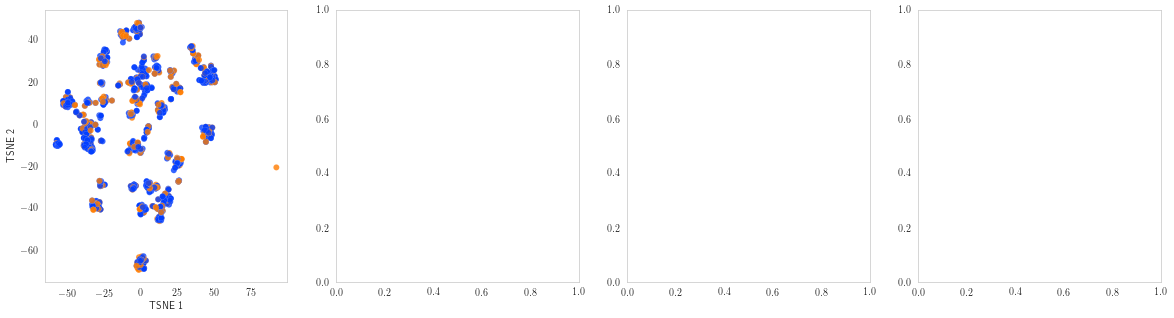

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Random split task
sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Random Split", legend=True,
                alpha=0.8, palette='bright', linewidth=0.1, ax = ax[0])

ax[0].set_title("Random Test/Train Split")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xbound(lower=-75, upper=75)
ax[0].set_ybound(lower=-70, upper=70)
ax[0].legend(bbox_to_anchor=(0, -0.2, 1, 1), ncol=2, mode="expand")

# DOI split task
sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
            hue="DOI Split", 
            fill=False, thresh=0.01,
            palette ='bright', gridsize=100, alpha = 0.8,
            ax = ax[1])

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOI Split", legend=True,
                alpha=0.8, 
                palette='bright', linewidth=0.1,
                ax = ax[1])

ax[1].set_title("Test/Train Split : DOI Hold-out")
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xbound(lower=-75, upper=75)
ax[1].set_ybound(lower=-70, upper=70)
ax[1].legend(bbox_to_anchor=(0, -0.2, 1, 1), ncol=2, mode="expand")

# Substrate split task
sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
            hue="Subtrate Split", 
            fill=False, thresh=0.05,
            palette ='bright', gridsize=300, alpha = 0.8,
            levels=5, ax = ax[2])

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Subtrate Split", legend=True,
                alpha=0.8, palette='bright', linewidth=0.1, ax = ax[2])

ax[2].set_title("Test/Train Split : Substrate Hold-out")
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_xbound(lower=-75, upper=75)
ax[2].set_ybound(lower=-70, upper=70)
ax[2].legend(bbox_to_anchor=(0, -0.2, 1, 1),ncol=2, mode="expand")

# Coupling Reagent Class - Split Task
sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
            hue="Coupling Reagent Split", 
            fill=False, thresh=0.05,
            palette ='bright', gridsize=300, alpha = 0.8,
            levels=5, ax = ax[3])

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent Split", legend=True,
                alpha=0.8, palette='bright', linewidth=0.1, ax = ax[3])

ax[3].set_title("Test/Train Split : Coupling Reagent Class Hold-out")
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].set_xbound(lower=-75, upper=75)
ax[3].set_ybound(lower=-70, upper=70)
ax[3].legend(bbox_to_anchor=(0, -0.2, 1, 1), ncol=2, mode="expand")

fig.tight_layout()

plt.savefig("exploration2.svg", dpi=600, bbox_inches='tight')
plt.show()

## Visualize Data Spliitng on a Restricetd Chemical Space

In [ ]:
# Restricted to one type of Coupling Partner :
Boron_df = tsne_df[tsne_df["Coupling Reagent Split"] == "Test Set"]
Not_Boron_df = tsne_df[tsne_df["Coupling Reagent Split"] == "Train Set"]

In [ ]:
ax = plt.figure(figsize=(5, 5))

# plot Boron data point and density
sns.kdeplot(data=Boron_df, x="TSNE 1", y="TSNE 2",
            fill=True, thresh=0.05,
            color='blue', gridsize=100,
            alpha = 0.4, linewidth=50,
           levels =5)

ax = sns.scatterplot(data=Boron_df, x="TSNE 1", y="TSNE 2", 
                hue="Random Split",
                alpha=0.8, 
                palette='bright', linewidth=0.1)

legend = ax.get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = legend.legendHandles

# plot not used data points
ax2 = sns.scatterplot(data=Not_Boron_df, x="TSNE 1", y="TSNE 2", 
                legend=True, alpha=0.2, 
                color='gray', linewidth=0.1)

# make common legend
legend2 = ax2.get_legend()
h3 = legend2.legendHandles[0]
h3.set_color("gray")
ax2.get_legend().remove()
h = [handles[0], handles[1], h3]
l = ["Boronic in Train Set", "Boronic in Test Set", "Other Coupling Reagents"]

# set figure titles and legend
ax.set_title("Random Test/Train Split\n Restricted to Boronic Coupling Partners")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xbound(lower=-75, upper=75)
ax.set_ybound(lower=-70, upper=70)
ax.legend(h, l, bbox_to_anchor=(1.6, 1.02), 
             ncol=1, title="Data type")

plt.savefig("exploration_restricted.svg", dpi=600, bbox_inches='tight')
plt.show()